In [1]:
import pandas as pd
import numpy as np # used for linear algebra and random sampling
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive, interact
import matplotlib as mpl
import seaborn as sns

# used for plotting charts within the notebook (instead of a separate window)
%matplotlib inline


march = pd.read_csv('./March.csv', encoding='latin1')
feb = pd.read_csv('./Feb.csv', encoding='latin1')


In [22]:
march['Month']= 'March'
feb['Month']= 'Feb'


In [3]:
inc = pd.concat([march,feb],ignore_index=True )

In [4]:
inc['Number'].count()

17288

In [5]:
print(inc.groupby(['Month']).count()[['Number']])
inc[inc['Priority'] == "2 - High"].groupby(['Month']).count()[['Number']]

       Number
Month        
Feb      7005
March   10283


,Number
Month,
Feb,347
March,448


In [6]:
inc.groupby(['Priority']).count()


,Number,Assignment group,Tracks,Created,State,Description,Short description,Impacted Configuration Item,GXP/Non-GXP,Resolution notes,...,Created by,Support Offering(OLA/UC),Service offering (E2E SLA),Last update,Resolved by,Work notes,Closed,Closed by,Business Application,Month
Priority,,,,,,,,,,,,,,,,,,,,,
1 - Critical,7,7,7,7,7,7,7,7,7,2,...,7,7,6,7,4,7,7,7,0,7
2 - High,795,795,795,795,795,795,795,795,795,447,...,795,795,97,795,792,734,795,795,0,795
3 - Moderate,14341,14341,14341,14341,14341,14340,14340,14341,14341,5454,...,14341,14341,2258,14341,14189,10766,14341,14341,0,14341
4 - Low,2145,2145,2145,2145,2145,2145,2145,2144,2145,1088,...,2145,2145,801,2145,2094,1961,2145,2145,0,2145


In [7]:
inc.groupby(['Month']).count()


,Number,Assignment group,Tracks,Priority,Created,State,Description,Short description,Impacted Configuration Item,GXP/Non-GXP,...,User Impacted,Created by,Support Offering(OLA/UC),Service offering (E2E SLA),Last update,Resolved by,Work notes,Closed,Closed by,Business Application
Month,,,,,,,,,,,,,,,,,,,,,
Feb,7005,7005,7005,7005,7005,7005,7005,7005,7005,7005,...,7004,7005,7005,1589,7005,6890,6069,7005,7005,0
March,10283,10283,10283,10283,10283,10283,10282,10282,10282,10283,...,10281,10283,10283,1573,10283,10189,7399,10283,10283,0


In [8]:
inc['Month'].value_counts()

March    10283
Feb       7005
Name: Month, dtype: int64

Text(0.5, 1.0, 'Incident trent for windows')

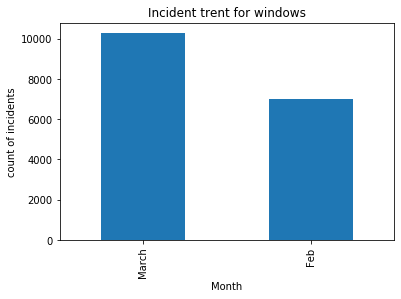

In [9]:
#incident count per month
inc['Month'].value_counts().plot(kind='bar')

# name the axis
plt.ylabel('count of incidents')
plt.xlabel('Month')
plt.title('Incident trent for windows')


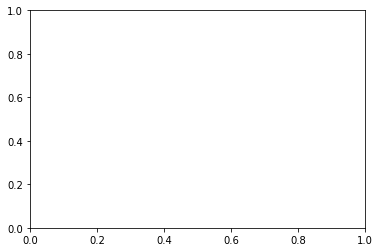

In [10]:
axes1 = plt.gca()
axes1

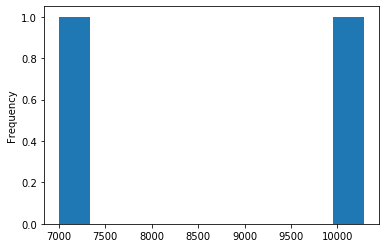

In [11]:
#incident count per month
inc['Month'].value_counts().plot(kind='hist', x='Month',y=0)

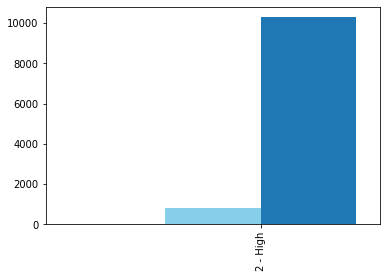

In [12]:
width = .20   
inc['Month'].value_counts().plot(kind='bar',position=0, width = width)
inc[inc['Priority'] == "2 - High"]['Priority'].value_counts().plot(kind='bar',color='skyblue', position=1, width = width)
plt.show()

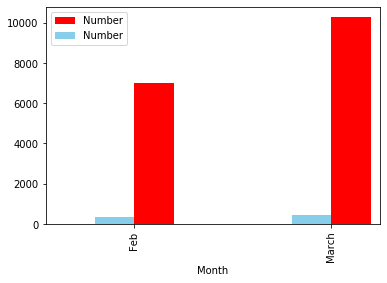

In [13]:

width = .20   
inc.groupby(['Month']).count()['Number'].plot(kind='bar',color='red',position=0, width = width)
inc[inc['Priority'] == "2 - High"].groupby(['Month']).count()['Number'].plot(kind='bar',color='skyblue', position=1, width = width)
plt.legend()
plt.show()

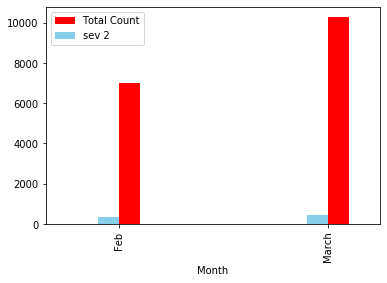

In [14]:
### keeping the y axis same that is number for multiple x axis.
width = .10 
ax= inc.groupby(['Month']).count()['Number']
ax.plot(kind='bar',color='red',position=0, width = width, label='Total Count')
inc[inc['Priority'] == "2 - High"].groupby(['Month']).count()['Number'].plot(kind='bar',color='skyblue', position=1, width = width, label='sev 2')
plt.legend()
plt.show()

In [15]:
list(inc['Tracks'].unique())

['Antivirus',
 'AS400',
 'Backup',
 'Commandcenter',
 'Control M',
 'Database',
 'Middleware',
 'VCC',
 'Public Cloud',
 'Rhythm',
 'SIS',
 'Storage',
 'Unix',
 'WAF',
 'WAN',
 'Windows',
 'WOS',
 'HPC']

In [16]:
#### way 1: to use widget

track = widgets.Dropdown(
    options=['All'] + list(inc['Tracks'].unique()),
    value='Windows',
    description='test:',
    disabled=False,
)
## similarly we can have dropdown for priority.
def plotit(track):
    inc2 = inc.copy()
    if track != 'All':
        inc2 = inc2[inc2['Tracks'] == track]
    inc2.groupby(['Month']).count()['Number'].plot(kind='bar',color='red',position=0, width = width, label='Total Count',stacked=True)
    inc2[inc2['Priority'] == "2 - High"].groupby(['Month']).count()['Number'].plot(kind='bar',color='skyblue', position=1, width = width, label='sev 2',stacked=True)
    plt.legend()
    plt.show()
    #print(track)
    
widgets.interactive(plotit, track= track)


interactive(children=(Dropdown(description='test:', index=16, options=('All', 'Antivirus', 'AS400', 'Backup', …

In [23]:
### way 2 to use widget
### The dropdown widget exposes the observe method, which takes a function that will be invoked when the value of the dropdown changes. As such, we will next create the observer handler to filter the dataframe by the selected values — note that the input argument of the handler, change, contains information about the changes that took place which allows us to access the new value (change.new).
## If the new value is ALL we remove the filter, otherwise we apply it:

track = widgets.Dropdown(
    options=['All'] + list(inc['Tracks'].unique()),
    value='Unix',
    description='test:',
    disabled=False,
)
def plotit(change):
    inc2 = inc.copy()
    if change.new != 'All':
        inc2 = inc2[inc2['Tracks'] == change.new]
    inc2.groupby(['Month']).count()['Number'].plot(kind='bar',color='red',position=0, width = width, label='Total Count',stacked=True)
    inc2[inc2['Priority'] == "2 - High"].groupby(['Month']).count()['Number'].plot(kind='bar',color='skyblue', position=1, width = width, label='sev 2',stacked=True)
    plt.legend()
    plt.show()
    #print(track)
    
#display(track)
#interactive(plotit, track= track)
track.observe(plotit, names='value')




In [18]:
track = widgets.Dropdown(
    options=['All'] + list(inc['Tracks'].unique()),
    value='Windows',
    description='test:',
    disabled=False,
)

display(track)

Dropdown(description='test:', index=16, options=('All', 'Antivirus', 'AS400', 'Backup', 'Commandcenter', 'Cont…

In [19]:
from IPython.display import display

In [20]:
slider = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)
#slider = widgets.IntSlider()
display(slider)

IntSlider(value=3, description='Slider:', max=10)

In [21]:
type(slider)

ipywidgets.widgets.widget_int.IntSlider